# HR Campstone Project

In [6]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [8]:
## Reading the data
hr = pd.read_csv("HR_Employee_Attrition_Data.csv")

# Random Forest Algorithm

In [9]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [10]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
hr.shape

(2940, 35)

In [12]:
#Columns Data types
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [13]:
#Empty Values in each columns
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
#Checking for null values 

hr.isnull().values.any()

False

In [15]:
# To get count of employee stayed in company or not

hr['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [16]:
(2466 - 474)/2466

0.8077858880778589

<AxesSubplot:xlabel='Age', ylabel='count'>

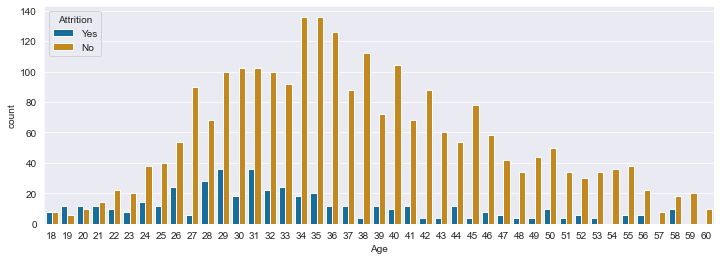

In [17]:
# No of employee  that left and stayed by age

import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x ='Age', hue='Attrition', data=hr, palette = 'colorblind')

In [18]:
#Observation : Age of 34 & 35 stayed in company and Age 29 & 31 people left the company

In [19]:
# To find all data types and their unique values

for column in hr.columns:
    if hr[column].dtype == 'object':
        print(str(column) + ' : ' + str(hr[column].unique()))
        print(hr[column].value_counts())
        print('..........................................')

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
..........................................
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
..........................................
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
..........................................
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
..........................................
Gender : ['Female' 'Male']
Male      1764
Female    1176
Name: Gender, dtype: int64
......

In [20]:
hr['StandardHours'].unique()

array([80], dtype=int64)

In [21]:
hr['EmployeeCount'].unique()

array([1], dtype=int64)

In [22]:
# Removing some columns which have only one value

hr = hr.drop('Over18', axis = 1)
hr = hr.drop('EmployeeNumber', axis = 1)
hr = hr.drop('StandardHours', axis = 1) # Only one unique value so removing it
hr = hr.drop('EmployeeCount', axis = 1)# Only one unique value so removing it

In [23]:
#Correlation check
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

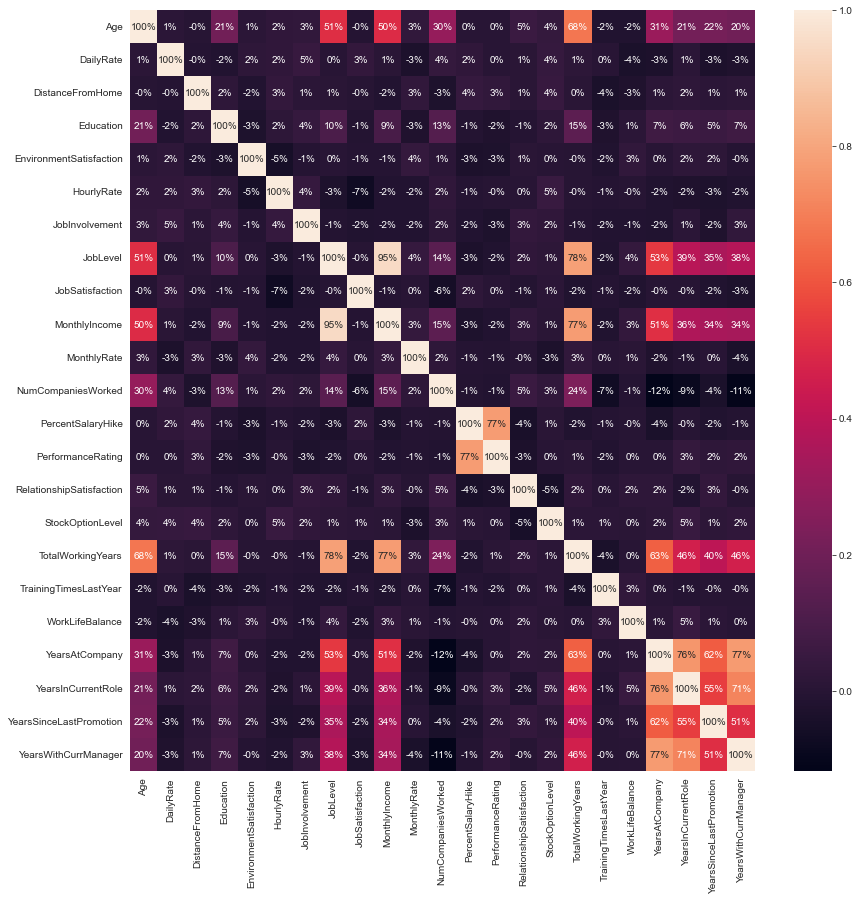

In [24]:
# Correlation Visual

plt.figure(figsize=(14,14))
sns.heatmap(hr.corr(), annot=True, fmt='.0%')

In [25]:
# From above heatmap
# Observtion : 
# Age & Total working years are positively correlated.
# Job level & Total working years are positively correlated.
# Job level & Monthly Income are positively correlated.
# Total Working years & Monthly Income are positively correlated.


In [102]:
# Dropping Correlated columns

hr = hr.drop('TotalWorkingYears', axis = 1)
hr = hr.drop('MonthlyIncome', axis = 1)
hr = hr.drop('PerformanceRating', axis = 1)

In [103]:
# Transform the data from object to Numbers

from sklearn.preprocessing import LabelEncoder

for column in hr.columns:
    if hr[column].dtype == np.number:
        continue
    hr[column] = LabelEncoder().fit_transform(hr[column])

C:\Users\ASuS\AppData\Local\Temp/ipykernel_1832/781090745.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if hr[column].dtype == np.number:


In [84]:
hr['Age_year'] = hr['Age']

In [28]:
hr = hr.drop('Age', axis = 1)

In [104]:
hr

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_year
0,1,2,624,2,0,1,1,1,0,64,...,0,0,0,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,12,3,1,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,4,1,0,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,0,2,0,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,1,3,1,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,494,1,22,1,3,2,1,11,...,6,2,1,3,2,5,2,0,3,18
2936,0,2,327,1,5,0,3,3,1,12,...,4,0,1,5,2,7,7,1,7,21
2937,0,2,39,1,3,2,1,1,1,57,...,9,1,1,0,2,6,2,0,3,9
2938,0,1,579,2,1,2,3,3,1,33,...,3,3,0,3,1,9,6,0,8,31


In [105]:
# Splitting the data

X = hr.iloc[:, 1:hr.shape[1]].values
Y = hr.iloc[:, 0].values

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 101)

In [107]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

In [108]:
forest.score(X_train,Y_train)

0.9965986394557823

In [109]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)

print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP)))

[[747   2]
 [ 45  88]]
Model Testing Accuracy = 0.9467120181405896


# Decision Tree Algorithm

In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [110]:
X = hr.iloc[:, 1:hr.shape[1]].values
Y = hr.iloc[:, 0].values

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [112]:
# Decision tree with depth = 2

from sklearn.tree import DecisionTreeClassifier


model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(X_train, Y_train)
model_dt_2_score_train = model_dt_2.score(X_train, Y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, Y_test)
print("Testing score: ",model_dt_2_score_test)


Training score:  0.8414115646258503
Testing score:  0.8554421768707483


In [113]:
# Decision tree with depth = 4

from sklearn.tree import DecisionTreeClassifier


model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(X_train, Y_train)
model_dt_4_score_train = model_dt_4.score(X_train, Y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(X_test, Y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.8732993197278912
Testing score:  0.8707482993197279


In [114]:
# Decision tree with depth = 8

from sklearn.tree import DecisionTreeClassifier


model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8)
model_dt_8.fit(X_train, Y_train)
model_dt_8_score_train = model_dt_8.score(X_train, Y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(X_test, Y_test)
print("Testing score: ",model_dt_8_score_test)


Training score:  0.953656462585034
Testing score:  0.9166666666666666


# Confusion Matrix

In [115]:
# Confusion Matrix for Decision tree ( Depth = 2)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test, model_dt_2.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)

print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP)))

[[477  35]
 [ 50  26]]
Model Testing Accuracy = 0.8554421768707483


In [116]:
# Confusion Matrix for Decision tree ( Depth = 4)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test, model_dt_4.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)

print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP)))

[[492  20]
 [ 56  20]]
Model Testing Accuracy = 0.8707482993197279


In [117]:
# Confusion Matrix for Decision tree ( Depth = 8)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test, model_dt_8.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)

print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP)))

[[502  10]
 [ 39  37]]
Model Testing Accuracy = 0.9166666666666666


In [99]:
model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(X_train, Y_train)
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

In [100]:
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Area under curve

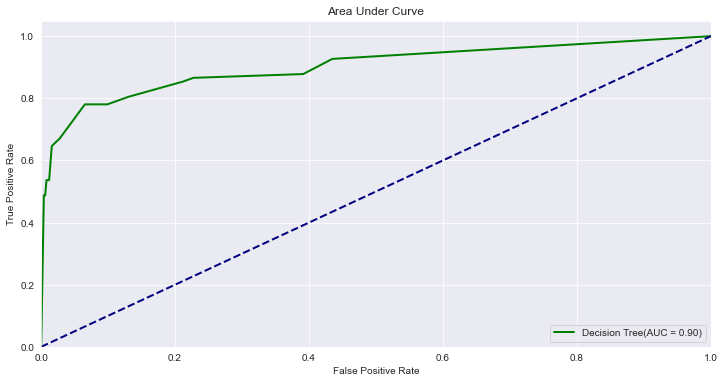

In [101]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()